# **Ex2- Linear Regression, Naive Base, Decision Tree

# Names and IDs

1.   Abed Shogan, 212112106
2.   Noam Shani 209969245

**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)


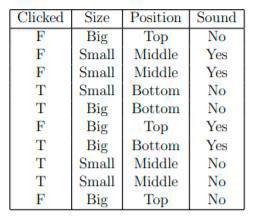

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

In [92]:
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression ## For Permforming Logistic Regression
from sklearn.tree import DecisionTreeClassifier ##For Building The Tree
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt ## to draw graphs
import numpy as np ## to calculate mean and std of leaves.
import pandas as pd ## to load, manipulate data , and encode categorical features. (Encoding isnt done with OH encoder this time)
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix
from sklearn.model_selection import  train_test_split ## to split dataset into training and test sets
from sklearn.model_selection import  cross_val_score # for Cross-Validation
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

1.2.2


# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [93]:
#Load Data
# # Load data into a DataFrame


# todo: change to this for colab
df = pd.read_csv('/content/Titanic.csv')


df.head()
df.dtypes
# Iterate over each column (feature), check missing values
missing_count = 0
for column in df.columns:
    # Iterate over each row in the column
    for index, value in df[column].items():
        if pd.isna(value) :
            missing_count+=1
print("Number of missing values: " + str(missing_count))   
missing_percentage = 100* missing_count/len(df)
print("Number of Records in DataSet: " + str(len(df)) + " \nRows with missing values account only " +"{:.2f}".format(missing_percentage) + "% of the Total DataSet")
print("We only have 6 Records with missing values which is not a lot(0.46%), so we can just remove them instead of imputing them, but we will impute them.")
            
# Deal with Missing Values

# Initialize SimpleImputer with 'mean' strategy for imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to your data
imp.fit(df)

# Transform your data to impute missing values
df_imputed = imp.transform(df)

# Convert the resulting NumPy array back to a DataFrame if necessary
df_cleaned = pd.DataFrame(df_imputed, columns=df.columns)
#We only have 6 Records with missing values which is not a lot, so we will just remove them instead of imputing them.


Number of missing values: 6
Number of Records in DataSet: 1309 
Rows with missing values account only 0.46% of the Total DataSet
We only have 6 Records with missing values which is not a lot(0.46%), so we can just remove them instead of imputing them, but we will impute them.


In [94]:
#Q1
print( "In Order to Start our Regression and Classification to build a Decesion Tree")
print("We will first Split the Data into a Training:Testing Split of 80:20 respectively.")
print("We will use 7 features to predict whether a passenger survived or not, we will name them as the independent_features")
print("the dependent feature is the Survived Column \n") 
# Drop ID and Survived, use the rest of the features to predict 'Survived'
X = df_cleaned.drop(['Passengerid', 'Survived'], axis=1)
Y = df_cleaned['Survived']
print("Shape of X DataFrame:", X.shape)
print("Shape of Y DataFrame:", Y.shape)

# Split the Dataset into Train and Test Sets 80:20.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check if age_train has any missing values (NaNs)
if Y_Train.isnull().any():
    print("Y_Train contains missing values (NaNs).")
else:
    print("Y_Train does not contain missing values (NaNs).")

# Scale our Numeric Data using scaler to values between 0-1
scaler = MinMaxScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)


#Apply Logistic regression. (5 points)

# Create our Logistic Regressor
logReg = LogisticRegression()

# Train our X and Y DataSets
logReg.fit(X_Train, Y_Train) 
#Predict our Test set
predictions = logReg.predict(X_Test)
# Calculate how accurately data was predicted
accuracy_logReg = accuracy_score(Y_Test, predictions)
print("\n")
print("Accuracy of Predictions made by the Logistic Regression Model:", accuracy_logReg)
print("\n")

# Apply Decision tree with max_depth=6 (5 points).

# Implement the Decision Tree with a max depth of 6
tree_model = DecisionTreeClassifier(max_depth=6)

# Train the Tree using the fit method
tree_model.fit(X_Train, Y_Train)

# We will Predict using our X_Test set which is used to predict the Y_Test Set (Age of passengers on the Titanic)
predictions = tree_model.predict(X_Test)

# Calculate accuracy
accuracy_tree = accuracy_score(Y_Test, predictions)
print("Accuracy of Predictions made by the Decision Tree:", accuracy_tree)

In Order to Start our Regression and Classification to build a Decesion Tree
We will first Split the Data into a Training:Testing Split of 80:20 respectively.
We will use 7 features to predict whether a passenger survived or not, we will name them as the independent_features
the dependent feature is the Survived Column 

Shape of X DataFrame: (1309, 7)
Shape of Y DataFrame: (1309,)
Y_Train does not contain missing values (NaNs).


Accuracy of Predictions made by the Logistic Regression Model: 0.7633587786259542


Accuracy of Predictions made by the Decision Tree: 0.7633587786259542


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [95]:
#Q2
# Create a new DecisionTree without a specific max_depth set
tree_model  = DecisionTreeClassifier()
# Define the parameter grid to search over
grid = {'max_depth': range(1, 9)}

# Create GridSearchCV object with Cross-Validation (here we use 5-fold Cross-Validation)
grid_search = GridSearchCV(estimator=tree_model, param_grid=grid, cv=5, scoring = 'accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_Train, Y_Train)  

# Get the best parameters and best score
best_max_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print("Best max depth:", best_max_depth)
print("Best score of:", best_score)

# Now let us see if a max depth of 2 is better than the previous

# Implement the Decision Tree with a max depth of 6
tree_model_depth_2 = DecisionTreeClassifier(max_depth=2)

# Train the Tree using the fit method
tree_model_depth_2.fit(X_Train, Y_Train)

# We will Predict using our X_Test set which is used to predict the Y_Test Set (Age of passengers on the Titanic)
predictions = tree_model_depth_2.predict(X_Test)

# Calculate accuracy
accuracy_tree = accuracy_score(Y_Test, predictions)
print("Accuracy of Predictions made by the Decision Tree:", accuracy_tree)

#We can clearly see we got a better score with this depth

Best max depth: 2
Best score of: 0.7984825700615175
Accuracy of Predictions made by the Decision Tree: 0.7786259541984732


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)



In [96]:
#Q3
# Train the model with Entropy as the criterion, use max_depth = 2 as it is the best according to Q2
entropy_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=42)
entropy_tree_model.fit(X_Train, Y_Train)
entropy_tree_predictions = entropy_tree_model.predict(X_Test)

# Train the model with Gini as the criterion, use max_depth = 2 as it is the best according to Q2
gini_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=2,random_state=42)
gini_tree_model.fit(X_Train, Y_Train)
gini_tree_predictions = gini_tree_model.predict(X_Test)

# Calculate accuracy using accuracy_score
entropy_accuracy = accuracy_score(Y_Test, entropy_tree_predictions)
gini_accuracy = accuracy_score(Y_Test, gini_tree_predictions)

print("Accuracy with Entropy:", entropy_accuracy)
print("Accuracy with Gini:", gini_accuracy)

if entropy_accuracy > gini_accuracy:
    print("The model trained with Entropy is better.")
elif entropy_accuracy < gini_accuracy:
    print("The model trained with Gini is better.")
else:
    print("Both models have the same accuracy.")

Accuracy with Entropy: 0.7786259541984732
Accuracy with Gini: 0.7786259541984732
Both models have the same accuracy.


# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/29+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

Local minimum found at: [1.47768422e-09 3.76013284e-01]


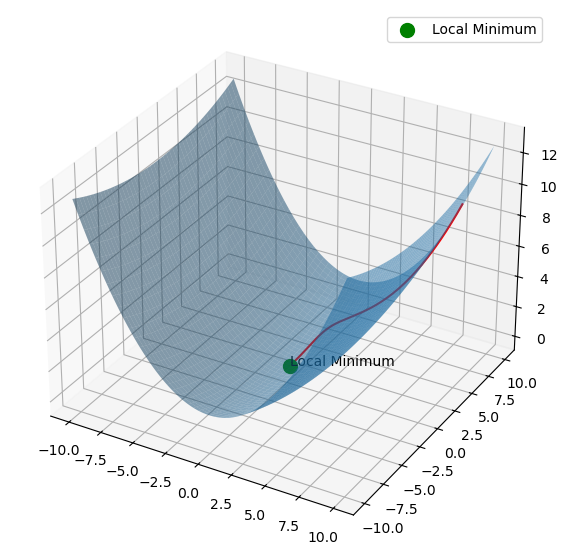

In [97]:
import numpy as np
import matplotlib.pyplot as plt

#Given imports
import numpy as np
import matplotlib.pyplot as plt

#Given function
def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

#Returns the Gradient for the given point (x,y) int Q4
def grad_func(x, y):
    # Calculating deriviatives (Gradient) 
    grad_x = 2 * x / 9
    grad_y = 2 * y / 64
    return grad_x, grad_y

#The Gradient Descent function
def gradient_descent(starting_point, learning_rate, num_iterations):
       # Set Starting Point (x,y)
    x, y = starting_point
        # initialize trajectory as array, first initialized with starting point
    trajectory = [starting_point]
    # iterate a constant amount of times
    for _ in range(num_iterations):
        # Calculate the Gradient of x and of y
        grad_x, grad_y = grad_func(x, y)
        # progress x by learning_rate of x * gradient of x
        x -= learning_rate * grad_x
             # progress y by learning_rate of y * gradient of y
        y -= learning_rate * grad_y
        # add to trajectory our new point after progression
        trajectory.append((x, y))
    # return array of points [(x_0,y_0),(x_1,y_1)....(x_n,y_n)]
    return trajectory

#Given code
x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

#Our code
starting_point = (8.5, 8.6)
learning_rate = 0.1
num_iterations = 1000
 # Get the trajectory array after applying Gradient Descent
trajectory = gradient_descent(starting_point, learning_rate, num_iterations)
trajectory = np.array(trajectory)
ax.plot3D(trajectory[:, 0], trajectory[:, 1], func(trajectory[:, 0], trajectory[:, 1]), 'r')

# Print and annotate the local minimum
local_minima = trajectory[-1]
print("Local minimum found at:", local_minima)
ax.scatter(local_minima[0], local_minima[1], func(*local_minima), color='g', s=100, label='Local Minimum')
ax.text(local_minima[0], local_minima[1], func(*local_minima), "Local Minimum", color='black')
    # Show Graph with Minimum
plt.legend()
plt.show()

In [98]:
#Q4